In [1]:
'''import os
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image

data_dir = '/content/drive/MyDrive/cvpr/'

datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

for person_folder in os.listdir(data_dir):
    person_folder_path = os.path.join(data_dir, person_folder)
    if os.path.isdir(person_folder_path):
        images = []
        for filename in os.listdir(person_folder_path):
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.JPG') or filename.endswith('.JPEG'):
                image_path = os.path.join(person_folder_path, filename)
                img = Image.open(image_path)
                img_array = np.array(img)
                images.append(img_array)
                break
        if images:
            images_array = np.array(images)
            images_array = images_array.reshape(-1, images_array.shape[1], images_array.shape[2], images_array.shape[3])
            i = 0
            for batch in datagen.flow(images_array,
                                      batch_size=1,
                                      save_to_dir='augmented_images',
                                      save_prefix='aug_' + person_folder,
                                      save_format='jpg'):
                i += 1
                if i >= 20:
                    break
print('Augmented image created')
'''

Augmented image created


In [7]:
import os

In [8]:
USERNAMES=os.listdir('/content/drive/MyDrive/cvpr/Train')
print(USERNAMES)
print(len(USERNAMES))

['SHEIKH AKIB ALMAS', 'SABBIR AHMED', 'TAHMID AL RAFID SIDDIQUE', 'SRABONE RAXIT', 'SADAT BIN MASUD', 'SATYAJIT DAS', 'SYEDA HUMAIRA JABEEN', 'TARIKUL ISLAM NISHAT', 'S M FAISAL', 'TAHFIM IBN KHAN', 'MOHAMMAD BIN AB JALIL SHEAKH', 'NAVID MAHFUZ NAYEEM', 'NAHAR ISLAM NISHI', 'MOHAMMAD NUR', 'RAHAD-UL-ISLAM RABBY', 'MOHAMMED TANVIR HASSAN', 'NAFIS MUBASSHIR SHAH', 'MD TOYABUR RAHAMAN', 'REZWAN AHMAD', 'MD WAHIDUZZAMAN SUVA', 'MD SAJID ISLAM KHAN', 'MD FARDIN AMIN RIYAD', 'MD MUNTASIR AREFIN NAEEM', 'MD IMTIAJ ALAM SAJIN', 'MD JAHID HASSAN', 'MD NAFIZ AHMED', 'MD ATIK ULLAH KHAN', 'MD ABU ZAYED KHAN', 'MD SHANZID HASAN', 'MD NAIMUR RAHMAN', 'ELMA ISLAM', 'FAHIM RAHMAN', 'ABDULLAH AL SHAHRIAR', 'AHMED IMTIAZ', 'AL-NAFI', 'ESM-E MOULA CHOWDHURY ABHA', 'IMAM HASAN JAMI', 'BISHANATH TARAFDER', 'FAIZA BINTE ZAMAN', 'ASHIK AHAMED']
40


In [ ]:
'''import os
import random
import shutil

original_folder = '/content/drive/MyDrive/cvpr/Train'
test_folder = '/content/drive/MyDrive/cvpr/Test'

if not os.path.exists(test_folder):
    os.makedirs(test_folder)

for person_folder in os.listdir(original_folder):
    person_folder_path = os.path.join(original_folder, person_folder)
    if os.path.isdir(person_folder_path):
        test_person_folder_path = os.path.join(test_folder, person_folder)
        if not os.path.exists(test_person_folder_path):
            os.makedirs(test_person_folder_path)

        images = [f for f in os.listdir(person_folder_path) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.JPG') or f.endswith('.JPEG')]

        selected_images = random.sample(images, min(5, len(images)))

        for image_name in selected_images:
            image_path = os.path.join(person_folder_path, image_name)
            destination_path = os.path.join(test_person_folder_path, image_name)
            shutil.move(image_path, destination_path)
'''

In [2]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.9 MB/s eta 0:00:00


In [3]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

In [11]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN
'''
def extract_face(filename, required_size=(160, 160)):
 image = Image.open(filename)
 image = image.convert('RGB')
 pixels = asarray(image)
 detector = MTCNN()
 results = detector.detect_faces(pixels)
 x1, y1, width, height = results[0]['box']
 x1, y1 = abs(x1), abs(y1)
 x2, y2 = x1 + width, y1 + height
 face = pixels[y1:y2, x1:x2]
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array

def load_faces(directory):
 faces = list()
 for filename in listdir(directory):
  path = directory + filename
  face = extract_face(path)
  faces.append(face)
  return faces

def load_dataset(directory):
 xy=[]
 for subdir in listdir(directory):
  path = directory + subdir + '/'
  if not isdir(path):
    continue
  faces = load_faces(path)
  for face in faces:
    il=[]
    il.append(face)
    il.append(USERNAMES.index(subdir))
    xy.append(il)

 return xy

trainXY = load_dataset('/content/drive/MyDrive/cvpr/Train')
testXY = load_dataset('/content/drive/MyDrive/cvpr/Test')
'''
print(trainXY)
#savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

[[array([[[151, 155, 138],
        [151, 154, 137],
        [151, 154, 137],
        ...,
        [ 27,  37,  29],
        [ 29,  39,  31],
        [ 33,  43,  35]],

       [[151, 155, 138],
        [151, 154, 137],
        [151, 154, 137],
        ...,
        [ 32,  42,  34],
        [ 33,  43,  35],
        [ 34,  44,  36]],

       [[151, 156, 138],
        [151, 155, 138],
        [152, 155, 137],
        ...,
        [ 26,  36,  28],
        [ 31,  41,  33],
        [ 34,  44,  36]],

       ...,

       [[ 34,  31,  21],
        [ 35,  27,  18],
        [ 42,  31,  22],
        ...,
        [ 84,  71,  64],
        [ 87,  74,  68],
        [ 87,  74,  68]],

       [[ 20,  15,   7],
        [ 29,  21,  12],
        [ 45,  34,  25],
        ...,
        [ 95,  82,  77],
        [ 88,  76,  71],
        [ 83,  72,  67]],

       [[ 30,  23,  15],
        [ 33,  24,  15],
        [ 34,  24,  15],
        ...,
        [119, 109, 105],
        [111, 100,  96],
        [101,  91,  87

In [35]:
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
'''with open('/content/drive/MyDrive/cvpr/train.pickle', 'wb') as f:
    pickle.dump(trainXY, f)
with open('/content/drive/MyDrive/cvpr/test.pickle', 'wb') as f:
    pickle.dump(testXy, f)
'''

In [13]:
train_data=[]
test_data=[]

with open('/content/drive/MyDrive/cvpr/train.pickle', 'rb') as f:
    train_data = pickle.load(f)
with open('/content/drive/MyDrive/cvpr/test.pickle', 'rb') as f:
    test_data = pickle.load(f)


In [19]:
import random
import numpy as np
random.shuffle(train_data)
random.shuffle(test_data)

train_dataX=[]
train_dataY=[]
test_dataX=[]
test_dataY=[]

for a, b in train_data:
  train_dataX.append(a)
  train_dataY.append(b)

for a, b in test_data:
  test_dataX.append(a)
  test_dataY.append(b)

print(np.array(train_dataX).shape)
print(np.array(train_dataY).shape)
print(np.array(test_dataX).shape)
print(np.array(test_dataY).shape)

(593, 160, 160, 3)
(593,)
(228, 160, 160, 3)
(228,)


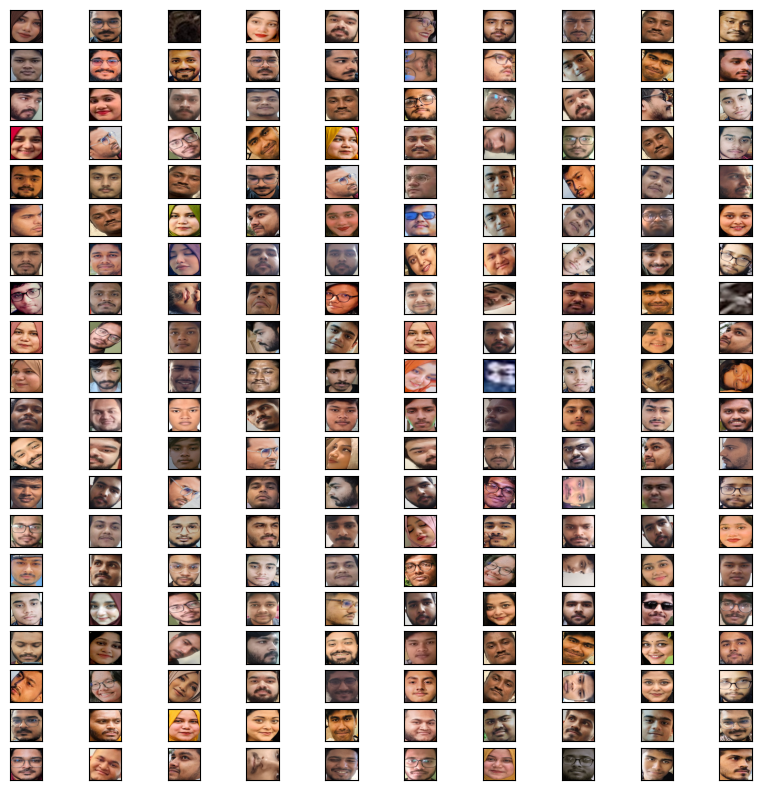

In [31]:
plt.figure(figsize=(10,10))
j=0
for i in train_dataX:
  plt.subplot(20,10,j+1)
  plt.imshow(i)
  plt.xticks([])
  plt.yticks([])
  j += 1
  if j==200:
    break


#plt.tight_layout()
plt.show()

In [32]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10369 sha256=545405935ec109b46342fa3b1c11bf5250dbce4502fa3865e054e98221589b36
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [83]:
!python --version


Python 3.10.12


In [2]:
%tensorflow_version 2.2

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
!pip install keras==2.3

  Using cached Keras-2.3.0-py2.py3-none-any.whl (377 kB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.1 requires keras>=3.0.0, but you have keras 2.3.0 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [5]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.0
    Uninstalling Keras-2.3.0:
      Successfully

In [7]:
!pip install keras==2.3

  Using cached Keras-2.3.0-py2.py3-none-any.whl (377 kB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.1 requires keras>=3.0.0, but you have keras 2.3.0 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [15]:
!apt-get install python3.6
!python3.6 -m pip install ipykernel
!python3.6 -m ipykernel install --user


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libcasa-python3-6' for regex 'python3.6'
Note, selecting 'libpython3.6-stdlib' for regex 'python3.6'
Note, selecting 'python3.6-2to3' for regex 'python3.6'
The following additional packages will be installed:
  libcasa-casa6
The following NEW packages will be installed:
  libcasa-casa6 libcasa-python3-6
0 upgraded, 2 newly installed, 0 to remove and 38 not upgraded.
Need to get 1,088 kB of archives.
After this operation, 4,238 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcasa-casa6 amd64 3.4.0-2build1 [1,000 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcasa-python3-6 amd64 3.4.0-2build1 [88.2 kB]
Fetched 1,088 kB in 1s (909 kB/s)
Selecting previously unselected package libcasa-casa6:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libcasa-

In [22]:
!pip uninstall tensorflow keras
!pip install tensorflow keras


Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.16.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: keras 3.0.5
Uninstalling keras-3.0.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-3.0.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-3.0.5
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
ERROR: pip's dependency resolver does not currently take int

In [8]:
!pip uninstall tensorflow
!pip install tensorflow==2.15


Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.16.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.16.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes

In [5]:
# Install TensorFlow 2.2
!pip install tensorflow==2.2

# Upgrade Keras to version 2.3 (or 2.4)
!pip install keras==2.3  # for Keras 2.3
# !pip install keras==2.4  # for Keras 2.4

# Check if Python 3.6 is already installed
!python --version

# If Python 3.6 is not installed, you may need to set up a separate environment with Python 3.6
# You can use tools like Conda or pyenv to manage Python environments


ERROR: Could not find a version that satisfies the requirement tensorflow==2.2 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.2
  Using cached Keras-2.3.0-py2.py3-none-any.whl (377 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0

Python 3.10.12


In [24]:
!which python
!python --version


/usr/local/bin/python
Python 3.10.12


In [18]:
!curl -L https://github.com/pyenv/pyenv-installer/raw/master/bin/pyenv-installer | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2827  100  2827    0     0   4557      0 --:--:-- --:--:-- --:--:--  4557
Cloning into '/root/.pyenv'...
remote: Enumerating objects: 1237, done.
remote: Counting objects: 100% (1237/1237), done.
remote: Compressing objects: 100% (689/689), done.
remote: Total 1237 (delta 723), reused 698 (delta 415), pack-reused 0
Receiving objects: 100% (1237/1237), 616.14 KiB | 4.43 MiB/s, done.
Resolving deltas: 100% (723/723), done.
Cloning into '/root/.pyenv/plugins/pyenv-doctor'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 38.72 KiB | 1.43 MiB/s, done.
Resolving deltas: 100% (

In [25]:
%env PYTHONPATH=

env: PYTHONPATH=


In [26]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 24.1 MB/s eta 0:00:00


In [27]:
!virtualenv myenv

created virtual environment CPython3.10.12.final.0-64 in 1713ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.1.0, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [40]:
# Update TensorFlow
!pip install --upgrade tensorflow

# If you're using Python 3.7, you can switch to it using the following command:
# %python3.7


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 648.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 933.6 k

In [36]:
!python --version

Python 3.8.18


In [ ]:
from keras.models import load_model
# load the model
model = load_model('facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

In [1]:
import tensorflow as tf
from tensorflow import keras
import sys

print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)
print("Python version:", sys.version)


Using TensorFlow backend.


TensorFlow version: 2.15.0


RecursionError: maximum recursion depth exceeded in comparison

In [82]:
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
from keras_facenet import FaceNet

# def get_embedding(model, face_pixels):
#  face_pixels = face_pixels.astype('float32')
#  mean, std = face_pixels.mean(), face_pixels.std()
#  face_pixels = (face_pixels - mean) / std
#  samples = expand_dims(face_pixels, axis=0)
#  yhat = model.predict(samples)
#  return yhat[0]



embedder = FaceNet()
#embeddings = embedder.embeddings(images)

newTrainX = list()
for face_pixels in train_dataX:
 embedding = embedder.embeddings(face_pixels)
 newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
newTestX = list()
for face_pixels in test_dataX:
 embedding = embedder.embeddings(face_pixels)
 newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
#savez_compressed('5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

INFO:keras_facenet.embedding_model:Loading weights.
INFO:keras_facenet.utils:Looking for /root/.keras-facenet/20180402-114759/20180402-114759-weights.h5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'inception_resnet_v1' (type Functional).
    
    Input 0 of layer "Conv2d_1a_3x3" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 160, 160)
    
    Call arguments received by layer 'inception_resnet_v1' (type Functional):
      • inputs=tf.Tensor(shape=(32, 160, 160), dtype=float32)
      • training=False
      • mask=None


In [50]:
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
trainX, trainy, testX, testy = newTrainX, train_dataY, newTestX, test_dataY
print(np.array(trainX).shape)
print(np.array(trainy).shape)
print(np.array(testX).shape)
print(np.array(testy).shape)
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

(593, 512)
(593,)
(228, 512)
(228,)
Dataset: train=593, test=228
Accuracy: train=3.373, test=1.754


Predicted: 35 (3.232)
Expected: 15


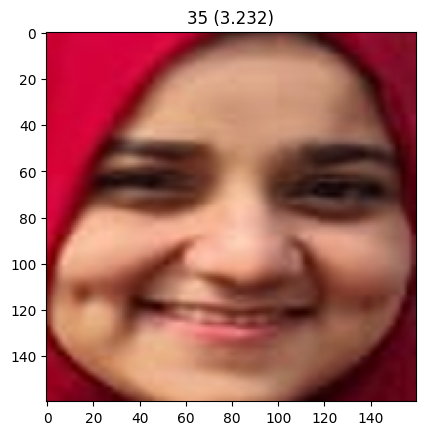

In [81]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
testX_faces = train_dataX

in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

In [51]:
import logging

logging.basicConfig()
log = logging.getLogger()
log.setLevel('INFO')